# Nonlinear Mapping

## Motivation: Can $(x + 1)^{2}$ be approximated throw a linear function?
Yes, but only if wew map the feature x into a new space: $\phi(x) = (a, b)$ with $a = x, b = x^{2}$

## Linear Regression with Basis Functions

$$
\Large \text{Nonlinear projection of features $\phi: \mathbb{R}^{D} -> \mathbb{R}^{M}$}
$$

Linear combinations of fixed __nonlinear functions__ of the input variables:

$$
\Large \text{$f(x_{i}, w) = w_{0} + \sum_{j=1}^{M} w_{j}\phi(x_{i})_{j}$}
$$

where $\phi(x_{i})_{j}$ are known as __basis functions__.

## Characteristics of this enhanced linear regression model:


$$
\Large \text{$f(x_{i}, w)$ is still a linear function of the weights $w_{i}$}
$$

$$
\Large \text{$f(x_{i}, w)$ is NOT a linear function of the input $x_{i}$}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed
np.random.seed(42)

In [3]:
# Create Noise
noise = np.random.normal(0, 0.8, 20)

# Creating data
X = np.linspace(-3, 3, 20)
X_continues = np.linspace(-3, 3, 100)
y = X*X + noise

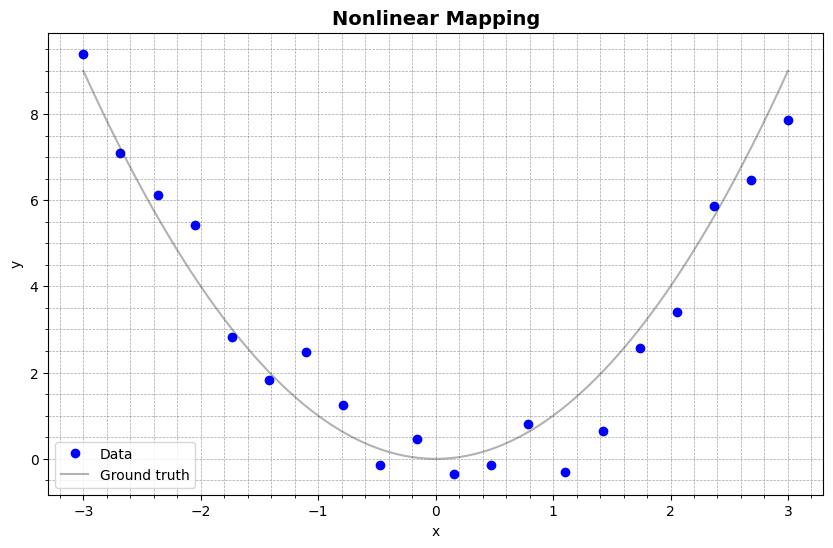

In [4]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'bo', label='Data')
plt.plot(X_continues, X_continues * X_continues, color='black', label='Ground truth', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# Mapping function: x -> (x, x^2)
def phi(x: float) -> tuple[float, float]:
    return (x, x**2)

# For plotting the approximated function
def f_model(x: float, w: np.array) -> np.array:
    x_mapped = phi(x)
    x_hat = np.array([x, x_mapped[0], x_mapped[1]])
    return x_hat[0] * w[0] + x_hat[1] * w[1] + x_hat[2] * w[2]

# Adding bias
def add_bias(X: np.array) -> np.array:
    return np.array([np.append(1, x) for x in X])

In [6]:
def gradient_descent(X: np.array, y: np.array, eps: float, max_iter: int, verbose: bool=False) -> np.array:
    w = np.zeros(3)
    X_b = add_bias(X)
    for iter in range(max_iter):
        for i in range(len(X)): 
            # Mapping x to higher dimension. 
            x_mapped = phi(X_b[i][1])
            x = np.array([X_b[i][0], x_mapped[0], x_mapped[1]])       # (3,)
            
            # Actual forward pass 
            y_hat = np.dot(x, w)                                    # (3,) * (3,) = (1,)
            
            # Caclulating gradient
            J = -2 * (y[i] - y_hat) * x                             # (3,)
            
            # Updating weights 
            w = w - eps * J                                         # (3,)

        # Printing loss
        if verbose:
            if iter % 10 == 0:
                Y_hat = f_model(X, w)
                loss = np.mean((y - Y_hat)**2) 
                print(f"Iter: {iter}, Loss: {loss}")
    return w

In [7]:
w_star = gradient_descent(X, y, eps=0.0001, max_iter=100, verbose=True)

Iter: 0, Loss: 16.42966307730274
Iter: 10, Loss: 4.001675590086293
Iter: 20, Loss: 1.4341751300109025
Iter: 30, Loss: 0.849749046963743
Iter: 40, Loss: 0.6816842770165825
Iter: 50, Loss: 0.6106759482632971
Iter: 60, Loss: 0.5679135467557037
Iter: 70, Loss: 0.5366785081020771
Iter: 80, Loss: 0.5119135999965592
Iter: 90, Loss: 0.4915624782816814


In [8]:
# Result weights
print(w_star)

[ 0.12190663 -0.1871468   0.94882232]


In [9]:
def f_model(x: float, w: np.array) -> np.array:
    x_mapped = phi(x)
    x_hat = np.array([x, x_mapped[0], x_mapped[1]])
    return x_hat[0] * w[0] + x_hat[1] * w[1] + x_hat[2] * w[2]

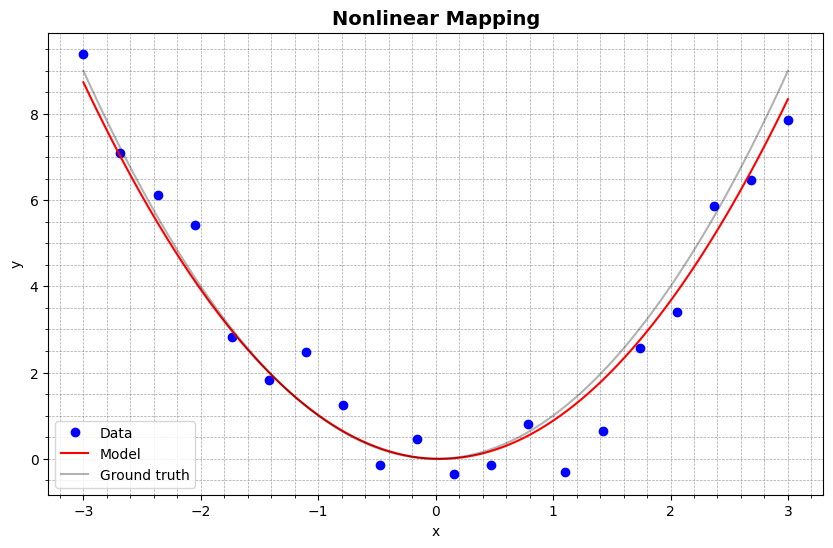

In [10]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'bo', label='Data')
plt.plot(X_continues, f_model(X_continues, w_star), color='red', label='Model')
plt.plot(X_continues, X_continues * X_continues, color='black', label='Ground truth', alpha=0.3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()